In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, f1_score, recall_score

In [119]:
#Data importing and one-hot encoding
df = pd.read_csv('titanic.csv')
#df1 = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
#df1 = pd.get_dummies(df1, columns=['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'], drop_first=True)

In [120]:
#Replacing NA with NA
df['Age'] = df['Age'].fillna(df['Age'].median())

In [121]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [122]:
df.dropna(inplace=True)

In [124]:
pclass_mapping = {1: '1st class', 2: '2nd class', 3: '3rd class'}
df['Pclass'] = df['Pclass'].replace(pclass_mapping)
df['Pclass'] = df['Pclass'].astype('object')

In [125]:
df['Pclass'].value_counts()

3rd class    491
1st class    214
2nd class    184
Name: Pclass, dtype: int64

In [126]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3rd class,male,22.0,1,0,7.2500,S
1,1,1st class,female,38.0,1,0,71.2833,C
2,1,3rd class,female,26.0,0,0,7.9250,S
3,1,1st class,female,35.0,1,0,53.1000,S
4,0,3rd class,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2nd class,male,27.0,0,0,13.0000,S
887,1,1st class,female,19.0,0,0,30.0000,S
888,0,3rd class,female,28.0,1,2,23.4500,S
889,1,1st class,male,26.0,0,0,30.0000,C


In [127]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first = True)

In [128]:
df.dtypes

Survived              int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Pclass_2nd class      uint8
Pclass_3rd class      uint8
Sex_male              uint8
Embarked_Q            uint8
Embarked_S            uint8
dtype: object

In [129]:
df1 = df.copy()

In [130]:
df1 = df.sample(len(df1))

In [131]:
df1[['Age', 'SibSp', 'Parch', 'Fare']] = (df1[['Age', 'SibSp', 'Parch', 'Fare']] - df1[['Age', 'SibSp', 'Parch', 'Fare']].mean()) / df1[['Age', 'SibSp', 'Parch', 'Fare']].std()


In [132]:
X = df1[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2nd class', 'Pclass_3rd class', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
Y = pd.DataFrame(df1['Survived'])

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [134]:
m = X_train.shape[0] #length of data

Coefficients after gradient descent:
Weights:
 [[ 2.84078003]
 [-0.45765614]
 [-0.38057741]
 [-0.03169892]
 [ 0.17413922]
 [-0.93807276]
 [-2.02537505]
 [-2.74689538]
 [-0.23556958]
 [-0.44112872]]


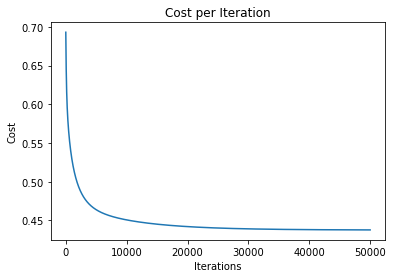

In [135]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.cost_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        m, n = X.shape # m: samples, n: features
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        
        self.w = np.zeros((X.shape[1], 1))
        
        for _ in range(self.num_iterations):
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            diff = h - Y
            
            gradient = np.dot(X.T, diff) / len(Y)
            self.w = self.w - self.learning_rate * gradient
            
            cost = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
            self.cost_history.append(cost)
    
    def predict_proba(self, X):
        m = X.shape[0]
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        return self.sigmoid(np.dot(X, self.w))
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

X = X_train
Y = y_train

model = LogisticRegressionGD(num_iterations=50000)
model.fit(X, Y)

print("Coefficients after gradient descent:")
print("Weights:\n", model.w)

plt.plot(model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()

In [136]:
model.w.reshape(-1, 5)

array([[ 2.84078003, -0.45765614, -0.38057741, -0.03169892,  0.17413922],
       [-0.93807276, -2.02537505, -2.74689538, -0.23556958, -0.44112872]])

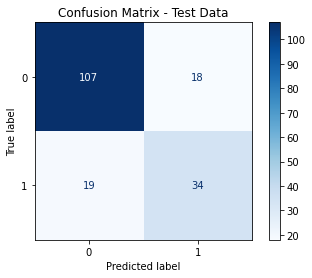

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       125
           1       0.65      0.64      0.65        53

    accuracy                           0.79       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.79      0.79      0.79       178



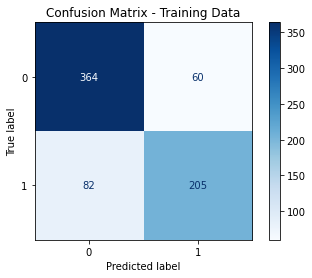

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.77      0.71      0.74       287

    accuracy                           0.80       711
   macro avg       0.79      0.79      0.79       711
weighted avg       0.80      0.80      0.80       711



In [137]:
# Predicting on test data
y_test_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)

# Predicting on training data
y_train_pred_proba = model.predict_proba(X_train)
y_train_pred = model.predict(X_train)

# Displaying the confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Data")
plt.show()
print("Classification Report - Test Data")
print(classification_report(y_test, y_test_pred))

# Displaying the confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Data")
plt.show()
print("Classification Report - Training Data")
print(classification_report(y_train, y_train_pred))
